# Reproduce: Density Dependent Exchange Contribution to $\partial\mu/\partial n$ and compressibility in Graphene

E. H. Hwang, Ben Yu-Kuang Hu, and S. Das Sarma, <i>Density Dependent Exchange Contribution to $\partial\mu/\partial n$ and Compressibility in Graphene</i>, Phys. Rev. Lett. <strong>99</strong>, 226801 (2007).

Reproduced by <strong>Eunjong Kim</strong> (<a href="mailto:ekim7206@gmail.com">ekim7206@gmail.com</a>)

In [1]:
from numpy import *
from scipy.integrate import dblquad
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
%matplotlib inline
rcParams.update({'font.size': 18, 'text.usetex': True})

Similarly as an electron gas system, the exchange self-energy in graphene is given by

$$
\hbar \Sigma_{s}^{(1\mathrm{E})} (\mathbf{k}) = -\sum_{s'} \int \frac{d^{2}k'}{(2\pi)^2} u(\mathbf{k}-\mathbf{k}') n_{\mathbf{k'},s'} F_{s,s'} (\mathbf{k},\mathbf{k'})
$$

where $u(\mathbf{q}) = 2\pi e^2 / \epsilon_0 q$ is the 2D Coulomb potential ($\epsilon_0$ is the background dielectric constant due to substrates) and $F_{s,s'}(\mathbf{k},\mathbf{k'}) = \left| \big\langle \psi_{\mathbf{k},s}\big\vert \psi_{\mathbf{k'},s'}\big\rangle \right|^2$ is the wavefunction overlap factor given by

$$
F_{s,s'} (\mathbf{k},\mathbf{k}') = \frac{1}{2} \left[ 1+ss'\cos{(\phi_{\mathbf{k}}-\phi_{\mathbf{k}'})}\right]
$$

in graphene. Here, $s=\pm1$ is the band index. At zero temperature ($T=0$) and the positive chemical potential ($\mu=\epsilon_\mathrm{F}>0$), 

$$n_{\mathbf{k}, s} = \Theta(\varepsilon_F - \varepsilon_{\mathbf{k}, s}) = 
\begin{cases}
\Theta(k_\mathrm{F}-k) &\mathrm{for}\ s = +1\\
1 &\mathrm{for}\ s = -1
\end{cases}
$$

We separate the exchange self-energy into contributions from the intrinsic electrons, $\Sigma_{x}^\mathrm{int}$, and the extrinsic carriers, $\Sigma_{x}^\mathrm{ext}$. That is, $\Sigma_{x,s}(k) = \Sigma_{x,s}^\mathrm{int}(k)+ \Sigma_{x,s}^\mathrm{ext}(k)$, where

$$\hbar\Sigma_{x,s}^\mathrm{int}(\mathbf{k}) = - \int \frac{d^2 k'}{(2\pi)^2} u(\mathbf{k}-\mathbf{k}') F_{s,-} (\mathbf{k},\mathbf{k}');$$
$$\hbar\Sigma_{x,s}^\mathrm{ext}(\mathbf{k}) = - \sum_{s'}\int \frac{d^2 k'}{(2\pi)^2} \delta n_{\mathbf{k}',s'}u(\mathbf{k}-\mathbf{k}') F_{s,s'} (\mathbf{k},\mathbf{k}'),$$

where $\delta n_{\mathbf{k}',s'} \equiv n_{\mathbf{k}',s'} - \frac{1}{2}(1-s')$ is the difference in the electron occupation from the intrinsic $T=0$ case. At zero temperature ($T=0$) and the positive chemical potential ($\mu=\epsilon_\mathrm{F}>0$),

$$
\delta n_{\mathbf{k}',+} = n_{\mathbf{k}',+} = \Theta(k_\mathrm{F} - k)\\
\delta n_{\mathbf{k}',-} = n_{\mathbf{k}',-} - 1 = 0
$$

and the exchange self-energy contributions from the extrinsic carriers, only $s'=+1$ in the summation remains, and


$$\hbar\Sigma_{x,s}^\mathrm{ext}(\mathbf{k}) = - \int \frac{d^2 k'}{(2\pi)^2} \delta n_{\mathbf{k}',+}u(\mathbf{k}-\mathbf{k}') F_{s,+} (\mathbf{k},\mathbf{k}') = -\int \frac{d^2 k'}{(2\pi)^2} \Theta(k_\mathrm{F}-k) \frac{2\pi e^2}{|\mathbf{k}-\mathbf{k}'|} \frac{1}{2} \left[1+s\cos{(\phi_\mathbf{k}-\phi_{\mathbf{k}'})}\right].
$$

For numerical evaluation of the integral, we assume that the wavevector $\mathbf{k}$ is directed along the $x$-direction, $\mathbf{k} = k\hat{\mathbf{x}}$ ($\phi_\mathbf{k}=0$),

$$\cos(\phi_\mathbf{k}-\phi_\mathbf{k'}) = \cos{\phi_\mathbf{k'}},$$
$$|\mathbf{k}-\mathbf{k'}| = \sqrt{k^2 + (k')^2 -2kk'\cos{\phi_\mathbf{k'}}}$$

$$
\hbar\Sigma_{x,s}^\mathrm{ext}(k) = -\frac{2\pi e^2}{\epsilon_0} \frac{1}{(2\pi)^2} \frac{1}{2}\int_{0}^{k_\mathrm{F}} k'dk' \int_{0}^{2\pi} d\phi' \frac{1+s\cos{\phi'}}{\sqrt{k^2 + (k')^2 -2kk'\cos{\phi'}}}
$$

We define unitless wavevectors $\tilde{k}\equiv k/k_\mathrm{F}$, $\tilde{k}'\equiv k'/k_\mathrm{F}$

$$
\frac{\hbar\Sigma_{x,s}^\mathrm{ext}(k)}{e^2k_\mathrm{F}/\epsilon_0} = -\frac{1}{4\pi} \int_{0}^{1} d\tilde{k}' \int_{0}^{2\pi}
 d\phi' \frac{\tilde{k}'(1+s\cos{\phi'})}{\sqrt{\tilde{k}^2 + \tilde{k}'^2 -2\tilde{k}\tilde{k}'\cos{\phi'}}}
$$

We make use of <code>scipy.integrate.dblquad</code> to evaluate the double integral:

In [3]:
def integrand(k,s,k_,phi): # define the integrand
    return k_*(1 + s*cos(phi)) / sqrt(k**2 + k_**2 - 2*k*k_*cos(phi))
def i(k,s): # double integration of the integrand
    return dblquad(lambda k_, phi: integrand(k,s,k_,phi), 0, 2*pi, lambda k_: 0, lambda k_: 1)[0]

In [4]:
k = linspace(1e-5, 2, 50)  # range of k/kF values: 0 to 2

SE_ext_p, SE_ext_m = zeros(len(k)), zeros(len(k))
for idx, k_ in enumerate(k):
    SE_ext_p[idx] = i(k_,+1)/(-4*pi)
    SE_ext_m[idx] = i(k_,-1)/(-4*pi)

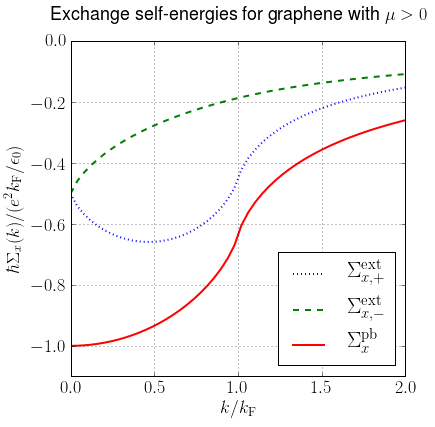

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.plot(k, SE_ext_p, label=r'$\Sigma_{x, +}^\mathrm{ext}$', lw=2, ls=':')
ax.plot(k, SE_ext_m, label=r'$\Sigma_{x, -}^\mathrm{ext}$', lw=2, ls='--')
ax.plot(k, SE_ext_p + SE_ext_m, label=r'$\Sigma_{x}^\mathrm{pb}$', lw=2, ls='-')

ax.set_xlim([0, 2]); ax.set_xlabel(r'$k/k_\mathrm{F}$')
ax.set_ylim([-1.1, 0]); ax.set_ylabel(r'$\hbar\Sigma_{x}(k)/(e^2 k_\mathrm{F}/\epsilon_0)$')
ax.legend(loc=0)
fig.text(0.08, 0.95, r'Exchange self-energies for graphene with $\mu>0$')
ax.grid(True);

and the Figure 1 of [PRL <b>99</b>, 226801 (2007)] is reproduced.

## Version Information

In [1]:
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.4.3 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.56)]
IPython 3.2.1
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.17.0.dev0+18ebef6
matplotlib 1.4.3
Wed Nov 11 16:24:11 2015 KST